In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt 
import numpy as np
from IPython.display import HTML, Markdown, display

In [33]:
# Import seaborn
import seaborn as sns

# Apply the default theme
sns.set_theme()

In [2]:
df = pd.read_csv('data/full_data.csv')

*Search for the id of the 2 teams*

In [3]:
league = "Serie_A"

df[df['league'] == league][['team_title', 'team_id']].drop_duplicates()

,team_title,team_id
486,Verona,94
494,Roma,95
502,Lazio,96
510,Bologna,97
518,Juventus,98
526,Udinese,99
534,Genoa,101
542,Napoli,105
550,Inter,106
558,Atalanta,107


In [4]:
league = "Bundesliga"

df[df['league'] == league][['team_title', 'team_id']].drop_duplicates()

,team_title,team_id
360,Bayern Munich,117
367,Bayer Leverkusen,119
374,Hoffenheim,120
381,Augsburg,121
388,Werder Bremen,123
395,Mainz 05,125
402,Borussia Dortmund,129
409,Borussia M.Gladbach,130
416,Wolfsburg,131
423,Eintracht Frankfurt,132


In [5]:
team_1 = "Juventus"
team_2 = "VfB Stuttgart"
leagues = ["Serie_A", "Bundesliga"]

In [10]:
team_1_df = df[(df['team_title'] == team_1)]
team_1_df.sort_values("gameweek",ascending=False).head()

,league,team_id,team_title,gameweek,h_a,xG,xGA,npxG,npxGA,ppda,...,loses,pts,npxGD,adv_id,adv_title,forecast_w,forecast_d,forecast_l,xG_diff,xGA_diff
525,Serie_A,98,Juventus,8,h,1.493050,0.064831,1.493050,0.064831,7.50,...,0,3,1.428219,96,Lazio,0.0116,0.1859,0.8025,0.493050,0.064831
524,Serie_A,98,Juventus,7,h,3.217090,1.045000,2.455790,0.283699,6.67,...,0,1,2.172091,116,Cagliari,0.0308,0.0955,0.8737,2.217090,0.045000
523,Serie_A,98,Juventus,6,a,2.918030,0.385259,2.156730,0.385259,9.43,...,0,3,1.771471,101,Genoa,0.0089,0.0499,0.9412,-0.081970,0.385259
522,Serie_A,98,Juventus,5,h,0.419301,0.233773,0.419301,0.233773,8.91,...,0,1,0.185528,105,Napoli,0.1433,0.5664,0.2903,0.419301,0.233773
521,Serie_A,98,Juventus,4,a,0.726024,0.601249,0.726024,0.601249,13.79,...,0,1,0.124775,108,Empoli,0.2754,0.3959,0.3287,0.726024,0.601249


In [11]:
team_2_df = df[(df['team_title'] == team_2)]
team_2_df.sort_values("gameweek",ascending=False).head()

,league,team_id,team_title,gameweek,h_a,xG,xGA,npxG,npxGA,ppda,...,loses,pts,npxGD,adv_id,adv_title,forecast_w,forecast_d,forecast_l,xG_diff,xGA_diff
436,Bundesliga,133,VfB Stuttgart,7,a,0.286656,3.618890,0.286656,3.618890,24.82,...,1,0,-3.332234,117,Bayern Munich,0.9817,0.0165,0.0018,0.286656,-0.381110
435,Bundesliga,133,VfB Stuttgart,6,h,1.725670,0.893468,0.828465,0.893468,7.76,...,0,1,-0.065003,120,Hoffenheim,0.1344,0.2685,0.5971,0.725670,-0.106532
434,Bundesliga,133,VfB Stuttgart,5,a,2.580360,1.038600,1.690750,1.038600,6.29,...,0,1,0.652150,131,Wolfsburg,0.0676,0.1569,0.7755,0.580360,-0.961400
433,Bundesliga,133,VfB Stuttgart,4,h,3.562180,0.606920,3.562180,0.606920,14.86,...,0,3,2.955260,129,Borussia Dortmund,0.0120,0.0446,0.9434,-1.437820,-0.393080
432,Bundesliga,133,VfB Stuttgart,3,a,2.721400,2.051360,2.721400,2.051360,10.14,...,0,3,0.670040,130,Borussia M.Gladbach,0.2402,0.2169,0.5429,-0.278600,1.051360


In [12]:
# df[(df['team_title'] == team_1) | (df['team_title'] == team_2)].head(20)

df.columns

Index(['league', 'team_id', 'team_title', 'gameweek', 'h_a', 'xG', 'xGA',
       'npxG', 'npxGA', 'ppda', 'ppda_allowed', 'deep', 'deep_allowed',
       'scored', 'conceded', 'xpts', 'result', 'date', 'wins', 'draws',
       'loses', 'pts', 'npxGD', 'adv_id', 'adv_title', 'forecast_w',
       'forecast_d', 'forecast_l', 'xG_diff', 'xGA_diff'],
      dtype='object')

In [13]:
teams = [(team_1, team_1_df), (team_2, team_2_df)]


cols = [
    "__Points__",
    ("pts", "mean", "Points (mean)", 1),
    ("xpts", "mean", "Expected Points (mean)", 0),
    "__Attacking__",
    ("xG", "mean", "Expected goals (mean)", 1),
    ("ppda_allowed", "mean", "PPDA allowed (mean)", 1),
    ("npxG", "mean", "Non-penalty xG (mean)", 1),
    ("deep", "mean", "Deep passes (mean)", 1),
    "__Scoring__",
    ("scored", "mean", "Goals scored (mean)", 1),
    # ("scored", "sum", "Goals scored (sum)", 1),
    ("xG_diff", "mean", "xG diff (mean)", 1),
    "__Defending__",
    ("ppda", "mean", "PPDA (mean)", -1),
    ("xGA", "mean", "xG allowed (mean)", -1),
    ("conceded", "mean", "Goals conceded (mean)", -1),
    ("npxGA", "mean", "Non-penalty xG allowed (mean)", -1),
    ("deep_allowed", "mean", "Deep passes allowed (mean)", - 1),
    "__Other__",
    ("deep", "sum", "Deep passes (sum)", 1),
    ("deep_allowed", "sum", "Deep passes allowed (sum)", - 1),
    ("npxGD", "mean", "Non-penalty xG diff (mean)", -1),
    ("xGA_diff", "sum", "xG allowed diff (sum)", 1),
]


table = "<table>"
table += f"<tr><td></td><th>{team_1}</th><th>{team_2}</th></tr>"
for col in cols:
    if type(col) == str:
        table += f"<tr><td colspan='3' style='text-align: center;'>{col.replace('__', ' ---------- ')}</td></tr>"
        continue

    c, fn, title, best = col
    if fn == "mean":
        v1 = team_1_df[c].mean()
        v2 = team_2_df[c].mean()
    elif fn == "sum":
        v1 = team_1_df[c].sum()
        v2 = team_2_df[c].sum()

    c1 = ""
    c2 = ""
    if best == 1:
        if v1 > v2:
            c1 = "green"
        elif v1 < v2:
            c2 = "green"
    elif best == -1:
        if v1 < v2:
            c1 = "green"
        elif v1 > v2:
            c2 = "green"

    table += f"<tr><td style='text-align: left;'>{title}</td><td style='color:{c1}'>{v1.round(decimals=2)}</td><td style='color:{c2}'>{v2.round(decimals=2)}</td></tr>"
    
table += "</table>"
display(HTML(table))

In [34]:
t_col = ['team_title', 'league']
cols = [*t_col, 'xG', 'xGA', 'npxG', 'npxGA', 'ppda', 'ppda_allowed', 'deep', 'deep_allowed', 'scored', 'conceded', 'pts', 'npxGD', 'xGA_diff', 'xG_diff']


m_df = df[cols].groupby(['team_title', 'league']).mean() 
m_df.reset_index(inplace=True)  

# m_df.head()

In [61]:
short = False
short_list = True

cols = [('xG', False), ('xGA', True), ('ppda', True), ('ppda_allowed', False), ('deep', False), ('deep_allowed', True), ('scored', False), ('conceded', True), ('pts', False), ('npxGD', False), ('xGA_diff', False), ('xG_diff', False)]

short_list_cols = ['xG', 'xGA', 'ppda', 'ppda_allowed', 'scored', 'conceded']


if short_list:
    cols = [(c, asc) for c, asc in cols if c in short_list_cols]

teams = [team_1, team_2]
table = ""
for c, asc in cols:
    for league in leagues:
        table += f"<div style='margin:10px'><h3>{c} {league}</h3><table>"
        vals = m_df[m_df['league'] == league].sort_values(c, ascending=asc)[['team_title', c]].values

        for i, (team, xG) in enumerate(vals):
            color = ""
            if team in teams:
                if short:
                    table += f"<tr style='color:{color}'><td>{i+1}</td><td>{team}</td><td>{xG}</td></tr>"
                else:
                    color = "green"
            if not short:
                table += f"<tr style='color:{color}'><td>{i+1}</td><td>{team}</td><td>{xG}</td></tr>"
        table += "</table></div>"

display(HTML("<div style='display:flex; flex-direction:row;flex-wrap: wrap; max-width:800px'>"+table+"</div>"))

1,Atalanta,2.352005
2,AC Milan,2.119815
3,Inter,2.009171125
4,Parma Calcio 1913,1.765763125
5,Fiorentina,1.765376625
6,Lazio,1.7049813875
7,Roma,1.650206375
8,Cagliari,1.577028875
9,Juventus,1.482013375
10,Napoli,1.454142375
11,Torino,1.327243125


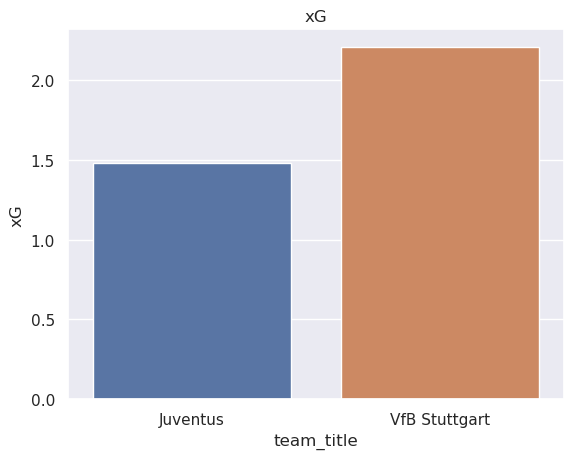

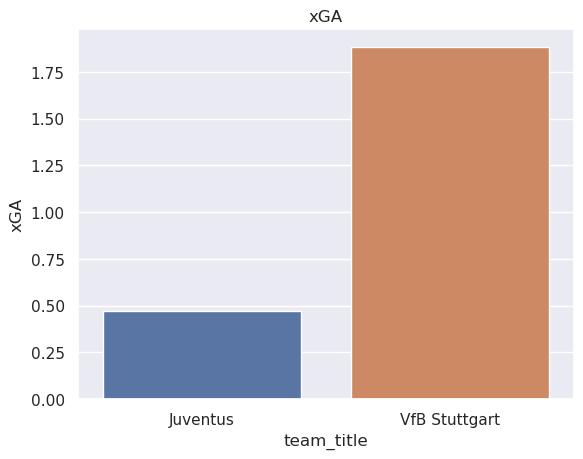

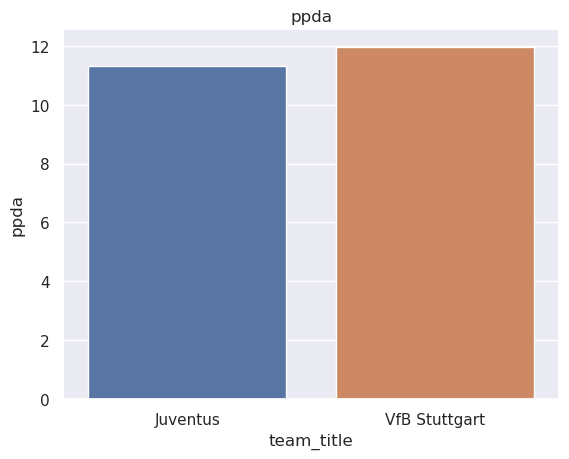

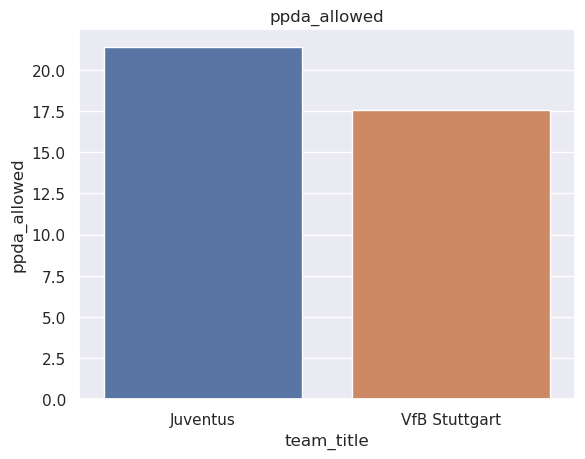

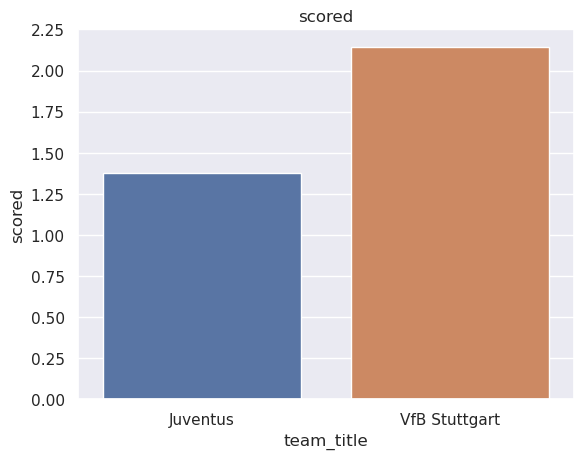

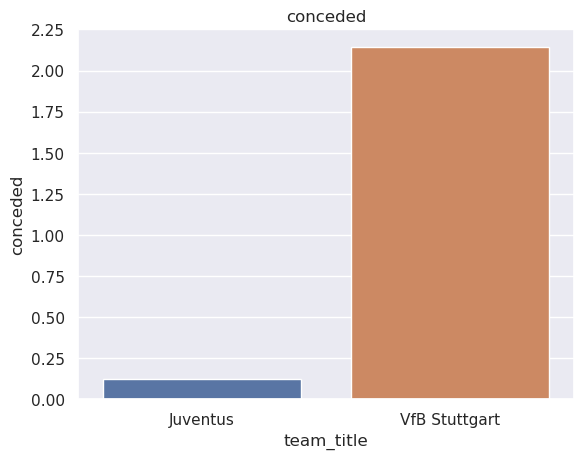

In [71]:
cols = ['xG', 'xGA', 'ppda', 'ppda_allowed', 'scored', 'conceded']

for c in cols:
    sns.barplot(data=m_df[(m_df["team_title"] == team_1) | (m_df["team_title"] == team_2)], x='team_title', y=c, hue='team_title')
    plt.title(c)
    plt.show()

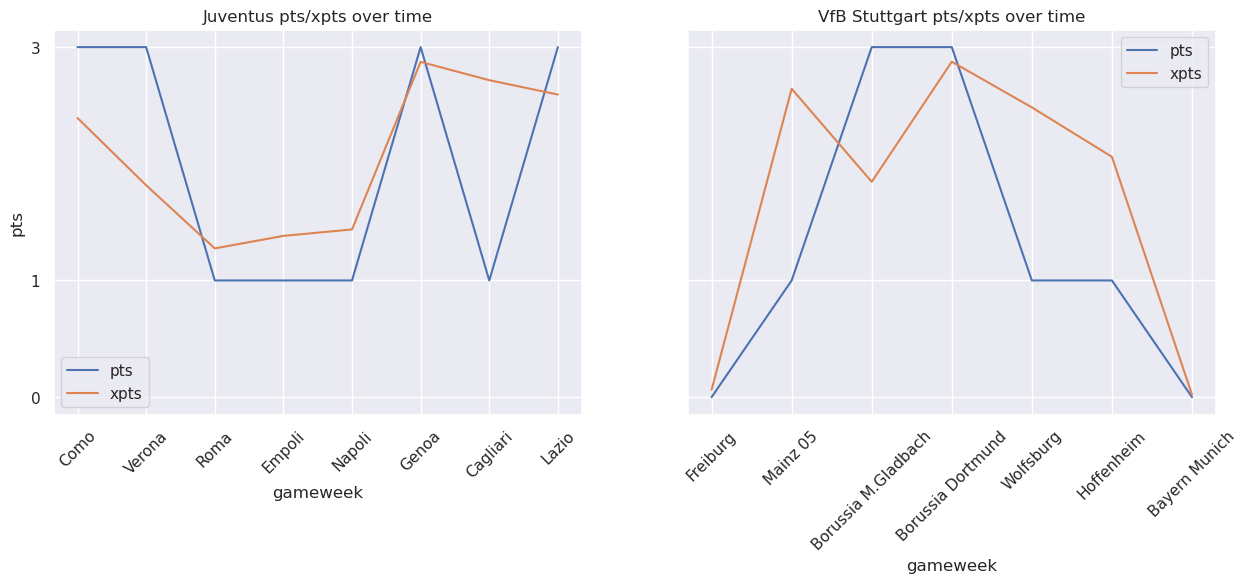

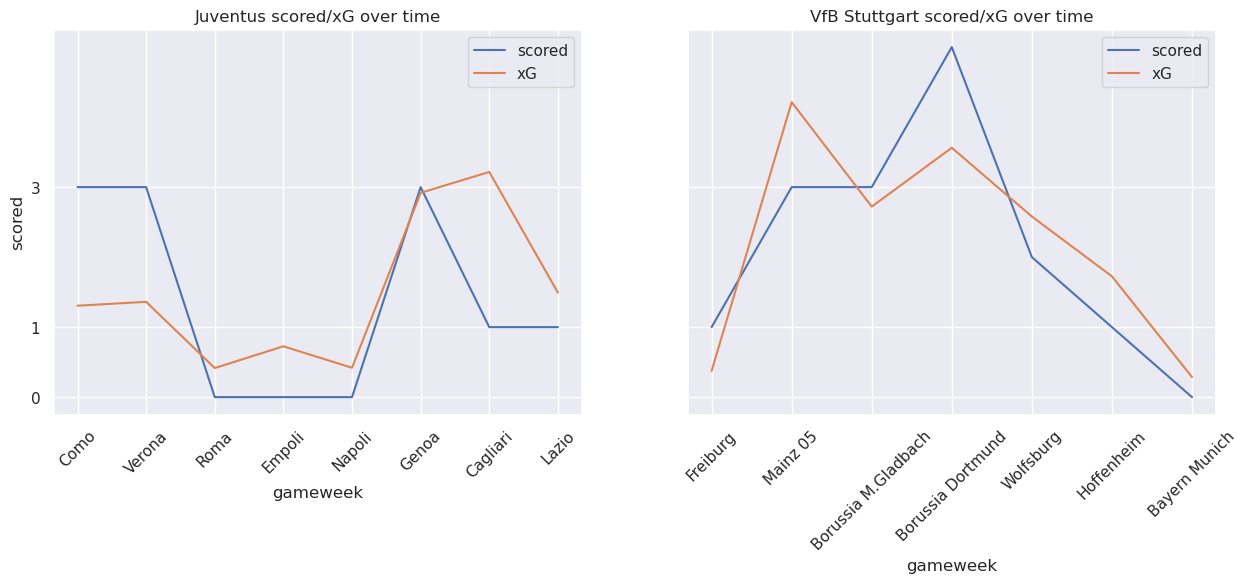

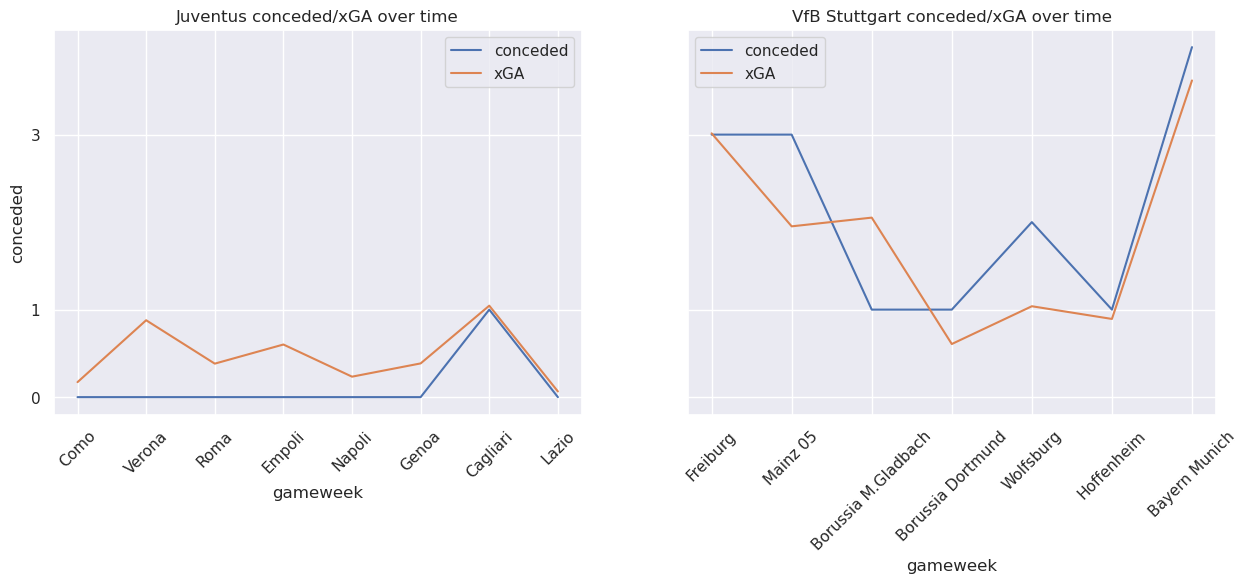

In [88]:
col_charts = [['pts', 'xpts'], ['scored', 'xG'], ['conceded', 'xGA']]


for c1, c2 in col_charts:
    fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

    for i, team in enumerate([team_1, team_2]):
        g = sns.lineplot(
            ax=axes[i],
            data=df[(df["team_title"] == team)],
            x="gameweek",
            y=c1,
            label=c1,
        )
        g = sns.lineplot(
            ax=axes[i],
            data=df[(df["team_title"] == team)],
            x="gameweek",
            y=c2,
            label=c2,
        )
        g = sns.lineplot(
            ax=axes[i],
            data=df[(df["team_title"] == team)],
            x="gameweek",
            y=c2,
            label=c2,
        )
        g.set_yticks([0, 1, 3])
        g.set_xticks(list(df[(df["team_title"] == team)].gameweek.values))
        g.set_xticklabels(
            list(df[(df["team_title"] == team)].adv_title.values), rotation=45
        )
        axes[i].set_title(f"{team} {c1}/{c2} over time")
    plt.show()

In [16]:
df_players = pd.read_csv('data/full_data_players.csv')

df_teams_players = df_players[(df_players['team_title'] == team_1) | (df_players['team_title'] == team_2)]

In [95]:
# df_teams_players.head()
df_teams_players.columns

Index(['id', 'player_name', 'games', 'time', 'goals', 'xG', 'assists', 'xA',
       'shots', 'key_passes', 'yellow_cards', 'red_cards', 'position',
       'team_title', 'npg', 'npxG', 'xGInvolved', 'xGInvolvedBuildUp',
       'league', 'xG_diff', 'p_scored', 'npxG_diff', 'assists_diff',
       'npxG_per_shot', 'npg90', 'npxG90', 'xG90', 'xA90'],
      dtype='object')

In [100]:
def best_scorers_team(team, df_teams_players, n=5):
    return df_teams_players[df_teams_players['team_title'] == team].sort_values('npg', ascending=False)[['player_name', 'position', 'time', 'xG', 'goals', 'npg','p_scored','xG_diff']].head(n)

def best_xg90(df_teams_players, n=10):
    return df_teams_players[df_teams_players['time'] >= 90].sort_values('xG90', ascending=False)[['player_name', 'team_title','position', 'time', 'xG90', 'goals', 'npg','p_scored','xG_diff']].head(n)


def bestBuilders(df_teams_players, n=10):
    return df_teams_players[df_teams_players['time'] >= 90].sort_values('xGInvolvedBuildUp', ascending=False)[['player_name', 'team_title','position', 'time', 'xGInvolvedBuildUp']].head(n)


def bestBuildersInvolved(df_teams_players, n=10):
    return df_teams_players[df_teams_players['time'] >= 90].sort_values('xGInvolved', ascending=False)[['player_name', 'team_title','position', 'time', 'xGInvolved', 'xA']].head(n)


,player_name,team_title,position,time,xG90,goals,npg,p_scored,xG_diff
931,Enzo Millot,VfB Stuttgart,M S,455,0.979646,3,3,0,1.952654
1304,Dusan Vlahovic,Juventus,F,672,0.908947,5,2,3,1.786804
995,El Bilal Touré,VfB Stuttgart,F S,133,0.890639,1,1,0,0.316167
919,Ermedin Demirovic,VfB Stuttgart,F S,418,0.789186,5,5,0,-1.334667
926,Deniz Undav,VfB Stuttgart,F M S,494,0.676398,4,4,0,-0.287326
1654,Teun Koopmeiners,Juventus,M S,360,0.297661,0,0,0,1.190646
1427,Francisco Conceição,Juventus,M S,159,0.262092,1,1,0,-0.536971
1120,Chris Führich,VfB Stuttgart,M S,205,0.230824,0,0,0,0.525767
1522,Douglas Luiz,Juventus,M S,259,0.157298,0,0,0,0.452668
1563,Kephren Thuram,Juventus,M S,252,0.144931,0,0,0,0.405807


Text(0.5, 1.0, 'Top xG90 players')

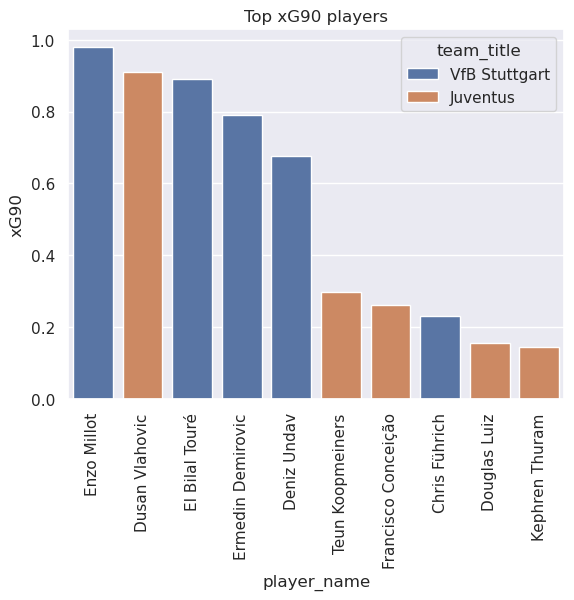

In [117]:
display(best_xg90(df_teams_players))
g = sns.barplot(data=best_xg90(df_teams_players), x='player_name', y='xG90', hue='team_title')
g.set_xticks(range(len(best_xg90(df_teams_players))))
g.set_xticklabels(
    list(best_xg90(df_teams_players).player_name), rotation=90
)
plt.title("Top xG90 players")

,player_name,position,time,xG,goals,npg,p_scored,xG_diff
1304,Dusan Vlahovic,F,672,6.786804,5,2,3,1.786804
1394,Andrea Cambiaso,D F M S,642,0.158742,1,1,0,-0.841258
1423,Samuel Mbangula,M S,310,0.103225,1,1,0,-0.896775
1424,Nicolò Savona,D S,443,0.493706,1,1,0,-0.506294
1427,Francisco Conceição,M S,159,0.463029,1,1,0,-0.536971


Text(0.5, 1.0, 'Top xG90 players')

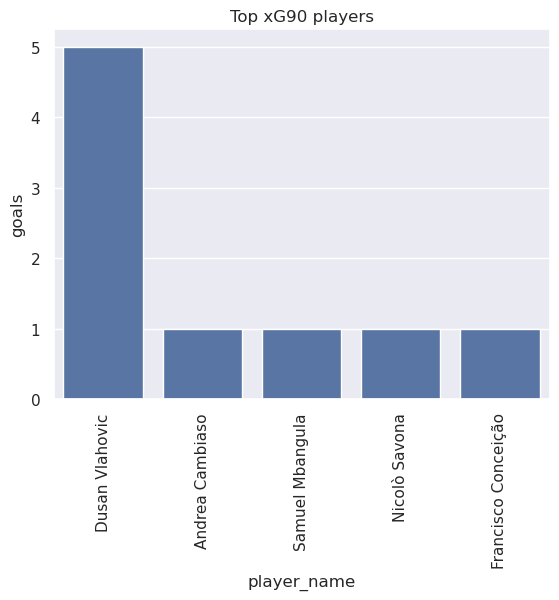

In [122]:
vals = best_scorers_team(team_1, df_teams_players)

display(vals)
g = sns.barplot(data=vals, x='player_name', y='goals')
g.set_xticks(range(len(vals)))
g.set_xticklabels(
    list(vals.player_name), rotation=90
)
plt.title("Top xG90 players")

,player_name,position,time,xG,goals,npg,p_scored,xG_diff
919,Ermedin Demirovic,F S,418,3.665333,5,5,0,-1.334667
926,Deniz Undav,F M S,494,3.712674,4,4,0,-0.287326
931,Enzo Millot,M S,455,4.952654,3,3,0,1.952654
995,El Bilal Touré,F S,133,1.316167,1,1,0,0.316167
1003,Jamie Leweling,D M,582,0.437714,1,1,0,-0.562286


Text(0.5, 1.0, 'Top xG90 players')

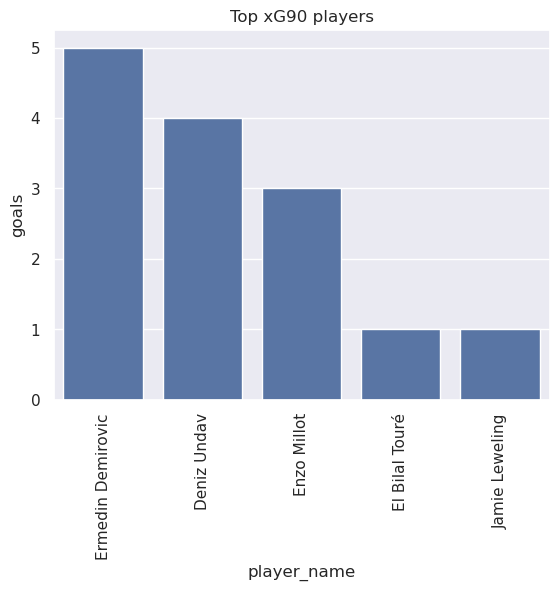

In [123]:
vals = best_scorers_team(team_2, df_teams_players)
display(vals)
g = sns.barplot(data=vals, x='player_name', y='goals')
g.set_xticks(range(len(vals)))
g.set_xticklabels(
    list(vals.player_name), rotation=90
)
plt.title("Top xG90 players")


,player_name,team_title,position,time,xGInvolvedBuildUp
1394,Andrea Cambiaso,Juventus,D F M S,642,3.015539
1548,Bremer,Juventus,D,540,2.964154
1183,Angelo Stiller,VfB Stuttgart,D M,628,2.661838
1252,Anrie Chase,VfB Stuttgart,D S,312,2.594746
1604,Pierre Kalulu Kyatengwa,Juventus,D S,446,2.416424
1566,Nicolo Fagioli,Juventus,M S,369,2.402887
1446,Manuel Locatelli,Juventus,M,514,2.365001
1563,Kephren Thuram,Juventus,M S,252,2.239608
1167,Atakan Karazor,VfB Stuttgart,M,543,2.179745
1496,Danilo,Juventus,D S,126,2.138342


Text(0.5, 1.0, 'Top xGInvolvedBuildUp players')

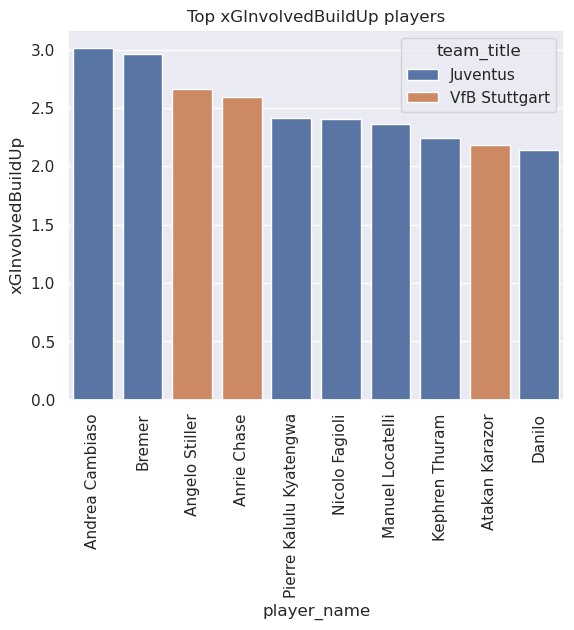

In [125]:
vals = bestBuilders(df_teams_players)

display(vals)
g = sns.barplot(data=vals, x='player_name', y='xGInvolvedBuildUp', hue='team_title')
g.set_xticks(range(len(vals)))
g.set_xticklabels(
    list(vals.player_name), rotation=90
)
plt.title("Top xGInvolvedBuildUp players")

,player_name,team_title,position,time,xGInvolved,xA
931,Enzo Millot,VfB Stuttgart,M S,455,5.500257,1.225733
1304,Dusan Vlahovic,Juventus,F,672,5.220396,0.470296
926,Deniz Undav,VfB Stuttgart,F M S,494,5.173137,0.476262
1394,Andrea Cambiaso,Juventus,D F M S,642,3.685630,1.198435
1548,Bremer,Juventus,D,540,2.977512,0.000000
1183,Angelo Stiller,VfB Stuttgart,D M,628,2.928890,0.663369
1003,Jamie Leweling,VfB Stuttgart,D M,582,2.863643,1.746105
1427,Francisco Conceição,Juventus,M S,159,2.780247,1.177091
1167,Atakan Karazor,VfB Stuttgart,M,543,2.772380,1.102601
1566,Nicolo Fagioli,Juventus,M S,369,2.658990,0.215659


Text(0.5, 1.0, 'Top xGInvolved players')

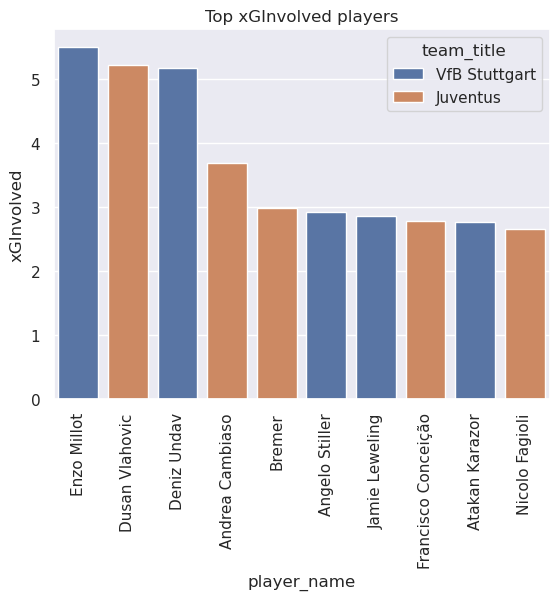

In [127]:
vals = bestBuildersInvolved(df_teams_players)
display(vals)
g = sns.barplot(data=vals, x='player_name', y='xGInvolved', hue='team_title')
g.set_xticks(range(len(vals)))
g.set_xticklabels(
    list(vals.player_name), rotation=90
)
plt.title("Top xGInvolved players")